## Business Problem

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged on every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers’ and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas



You as a Data scientist at Thera bank need to come up with a classification model that will help bank improve their services so that customers do not renounce their credit cards

## Objective

1. Explore and visualize the dataset.
2. Build a classification model to predict if the customer is going to churn or not
3. Optimize the model using appropriate techniques
4. Generate a set of insights and recommendations that will help the bank

## Data Dictionary


* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

### Import Libraries

In [1]:
import warnings

warnings.filterwarnings("ignore")
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline

#libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier)
from xgboost import XGBClassifier

### Loading the dataset

In [2]:
data = pd.read_csv("C:/Users/kasoju/Desktop/KASOJU/PGDSBA/model tuning/BankChurners.csv")

##### Top five rows of dataset

In [3]:
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

##### Last five rows of dataset

In [4]:
data.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
10122              40  ...                       2                      3   
10123              25  ...                       2                      3   
10124              36  ...                       3                      4   
10125              36  ...                       3                      3   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
10122        4003.0                 1851           2152.0   
10123        4277.0                 2186           2091.0   
10124        5409.0                    0           5409.0   
10125        5281.0                    0           5281.0   
10126       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122                 0.703            15476             117   
10123                 0.804             8764              69   
10124                 0.819            10291              60   
10125                 0.535             8395              62   
10126                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189  

[5 rows x 21 columns]

In [5]:
#checking dataset columns, and rows
data.shape

(10127, 21)

In [6]:
#Checking dataset column names
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [7]:
data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### Statistical summary of dataset

In [9]:
data.describe().T

count          mean           std          min  \
CLIENTNUM                 10127.0  7.391776e+08  3.690378e+07  708082083.0   
Customer_Age              10127.0  4.632596e+01  8.016814e+00         26.0   
Dependent_count           10127.0  2.346203e+00  1.298908e+00          0.0   
Months_on_book            10127.0  3.592841e+01  7.986416e+00         13.0   
Total_Relationship_Count  10127.0  3.812580e+00  1.554408e+00          1.0   
Months_Inactive_12_mon    10127.0  2.341167e+00  1.010622e+00          0.0   
Contacts_Count_12_mon     10127.0  2.455317e+00  1.106225e+00          0.0   
Credit_Limit              10127.0  8.631954e+03  9.088777e+03       1438.3   
Total_Revolving_Bal       10127.0  1.162814e+03  8.149873e+02          0.0   
Avg_Open_To_Buy           10127.0  7.469140e+03  9.090685e+03          3.0   
Total_Amt_Chng_Q4_Q1      10127.0  7.599407e-01  2.192068e-01          0.0   
Total_Trans_Amt           10127.0  4.404086e+03  3.397129e+03        510.0   
Total_Trans_Ct            10127.0  6.485869e+01  2.347257e+01         10.0   
Total_Ct_Chng_Q4_Q1       10127.0  7.122224e-01  2.380861e-01          0.0   
Avg_Utilization_Ratio     10127.0  2.748936e-01  2.756915e-01          0.0   

                                   25%           50%           75%  \
CLIENTNUM                 7.130368e+08  7.179264e+08  7.731435e+08   
Customer_Age              4.100000e+01  4.600000e+01  5.200000e+01   
Dependent_count           1.000000e+00  2.000000e+00  3.000000e+00   
Months_on_book            3.100000e+01  3.600000e+01  4.000000e+01   
Total_Relationship_Count  3.000000e+00  4.000000e+00  5.000000e+00   
Months_Inactive_12_mon    2.000000e+00  2.000000e+00  3.000000e+00   
Contacts_Count_12_mon     2.000000e+00  2.000000e+00  3.000000e+00   
Credit_Limit              2.555000e+03  4.549000e+03  1.106750e+04   
Total_Revolving_Bal       3.590000e+02  1.276000e+03  1.784000e+03   
Avg_Open_To_Buy           1.324500e+03  3.474000e+03  9.859000e+03   
Total_Amt_Chng_Q4_Q1      6.310000e-01  7.360000e-01  8.590000e-01   
Total_Trans_Amt           2.155500e+03  3.899000e+03  4.741000e+03   
Total_Trans_Ct            4.500000e+01  6.700000e+01  8.100000e+01   
Total_Ct_Chng_Q4_Q1       5.820000e-01  7.020000e-01  8.180000e-01   
Avg_Utilization_Ratio     2.300000e-02  1.760000e-01  5.030000e-01   

                                   max  
CLIENTNUM                 8.283431e+08  
Customer_Age              7.300000e+01  
Dependent_count           5.000000e+00  
Months_on_book            5.600000e+01  
Total_Relationship_Count  6.000000e+00  
Months_Inactive_12_mon    6.000000e+00  
Contacts_Count_12_mon     6.000000e+00  
Credit_Limit              3.451600e+04  
Total_Revolving_Bal       2.517000e+03  
Avg_Open_To_Buy           3.451600e+04  
Total_Amt_Chng_Q4_Q1      3.397000e+00  
Total_Trans_Amt           1.848400e+04  
Total_Trans_Ct            1.390000e+02  
Total_Ct_Chng_Q4_Q1       3.714000e+00  
Avg_Utilization_Ratio     9.990000e-01

### Checking for the missing values

In [10]:
data.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

* No missing values present in dataset, so no need of missing value treatment

## EDA

In [11]:
#make a copy of original dataset and use it for further analysis
df = data.copy()

In [12]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [13]:
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

### Univariate analysis

In [16]:
def perc_on_bar(feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    # Creating a countplot for the feature
    sns.set(rc={"figure.figsize": (10, 5)})
    ax = sns.countplot(x=feature, data=data)

    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.1  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=14)  # annotate the percantage

    plt.show()  # show the plot

In [15]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### Observations on Attrited customers

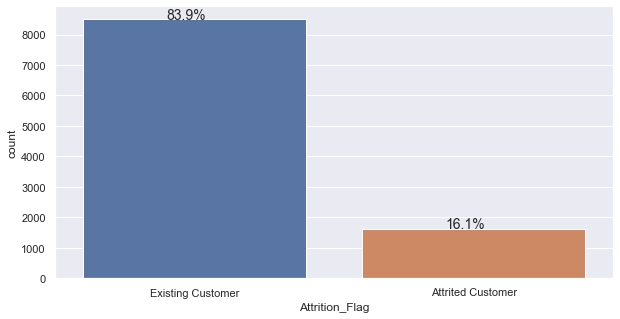

In [17]:
perc_on_bar(df['Attrition_Flag'])

* with the above histogram it means 83.9% of data are still existing/using credit card services where 16.1% customers are churned.

### Observations on Gender

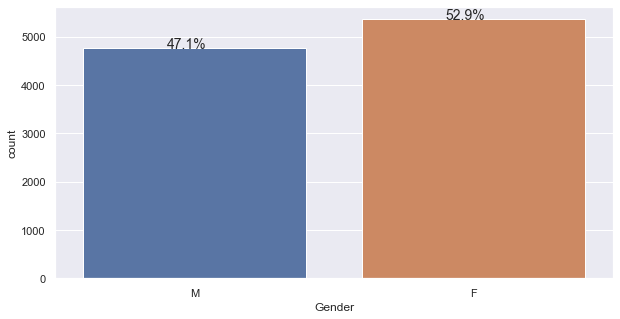

In [163]:
perc_on_bar(df['Gender'])

* We have 52.9% female customers and 471% male customers.

### Observation on Education

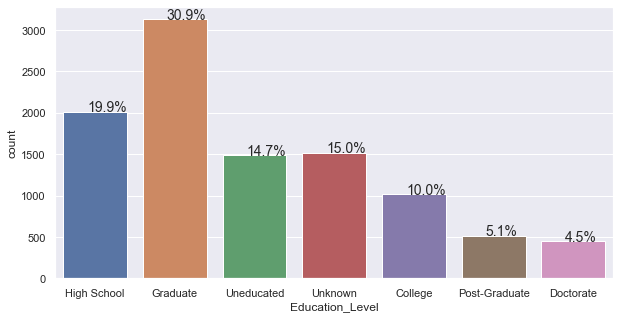

In [164]:
perc_on_bar(df['Education_Level'])

* From the education level, we can see approximately 50% of customers are coming from High School & Graduate level eduction.
Highest are Graduate level customers with 30.9% and followed by High school level customers with 19.9%. and lowest are from doctorate levelwith 4.5%, 15% are having unlown education level, they can be missing info or may be they are having other education like diploma, certifictes and etc..

### Observation on Marital Status

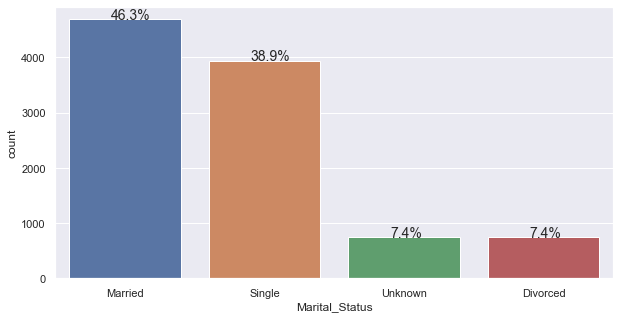

In [165]:
perc_on_bar(df['Marital_Status'])

* 46.3% customers are married and 38.9% customers are single. where 7.4% customers marital status is unknown.

### Observations on card Category

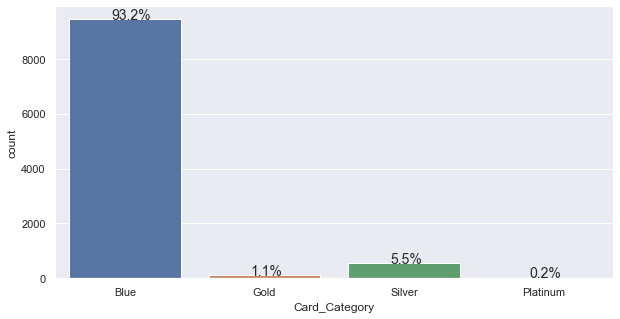

In [166]:
perc_on_bar(df['Card_Category'])

* 93.2%of customers are having Blue category card. so we can assume it is the asiest or entry level credit card with highest approvals for all type of customers or this category of credit card having good benefits. 
* only 0.2%are having platinum, 1.1% having gold, and 5.5% having silver. with this we can see level of credit card starts with Blue, Silver, Gold and Platinum.

### Observations on Income Cateogory

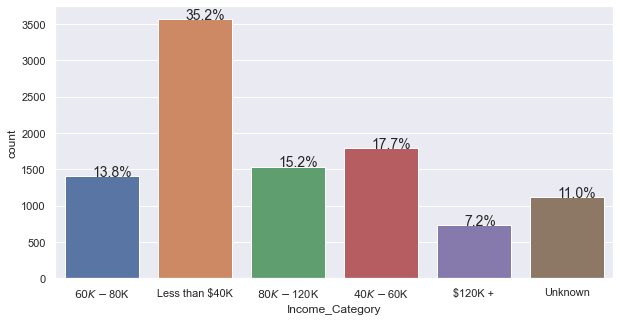

In [167]:
perc_on_bar(df['Income_Category'])

### Observations on Dependent Count

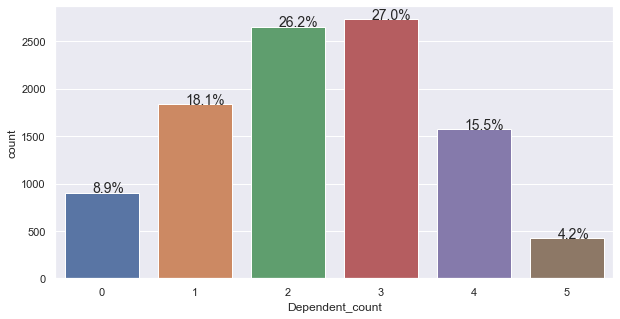

In [168]:
perc_on_bar(df['Dependent_count'])

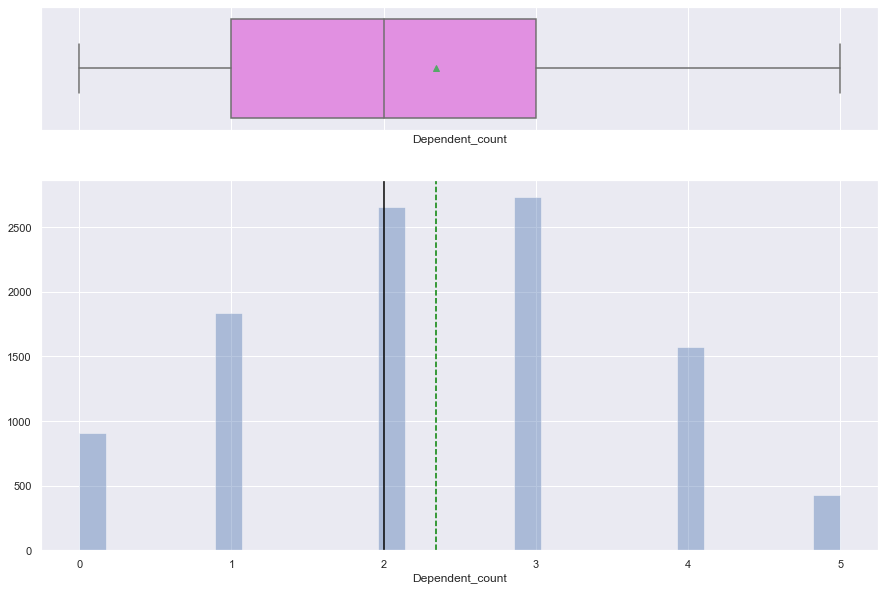

In [169]:
histogram_boxplot(df['Dependent_count'])

* Data for dependent count is distributed normally. the mean is almost exactly in the middle of the data.
* But customers with dependents 2 and 3 are equal to 53% of data.

### Observations on Age

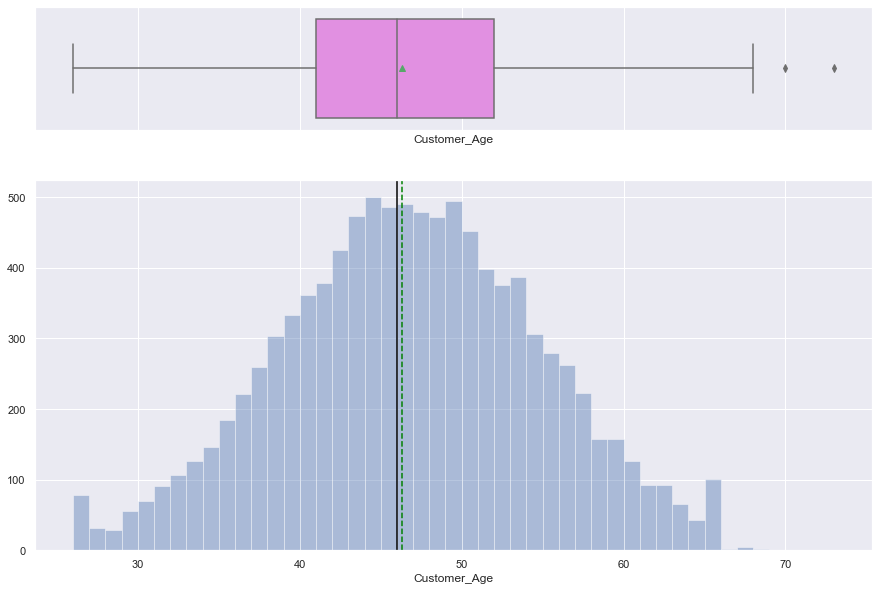

In [170]:
histogram_boxplot(df['Customer_Age'])

* As we can see median and mean are very close in the data. the data is distributed normally. the mean/average age is 26.

### Observations on Avg Utilization ratio

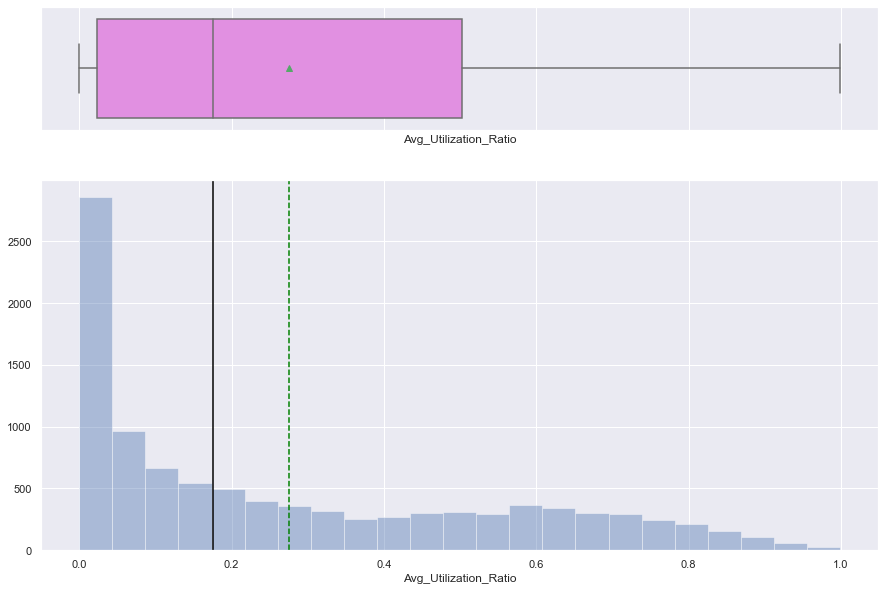

In [171]:
histogram_boxplot(df['Avg_Utilization_Ratio'])

* Data for Average Credit Utilization ratio shows right skewed, and from the box plot we can see most of the utilization ratio data is lying between 0 and 0.6 that means large number of customers are utilizing upto to 60%. and average utilization is close to 0.3

### Observations on Credit Limit

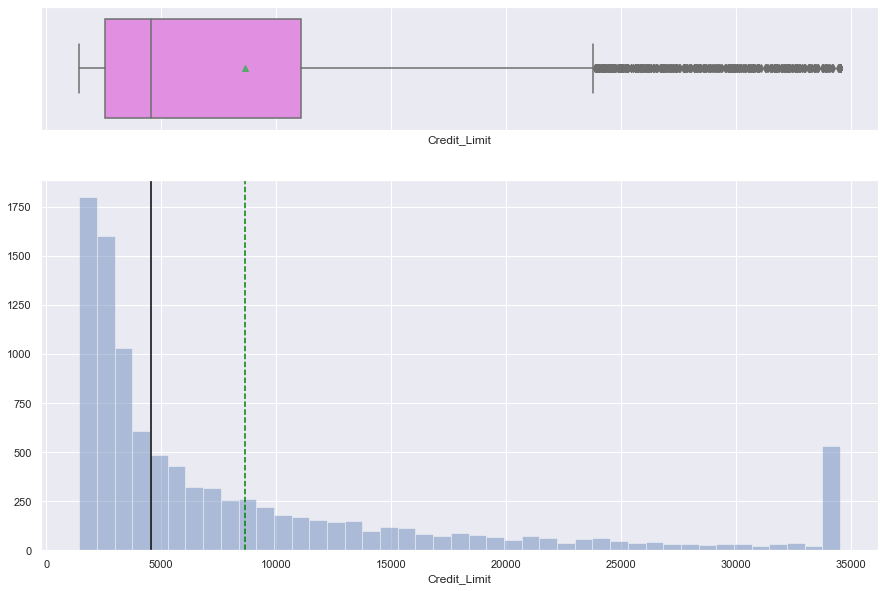

In [172]:
histogram_boxplot(df['Credit_Limit'])

* Data for Credit limit shows right skewed.
* maximum limit is upto 35000
* average limit is 8631
*  There are some outliers on the right end of the boxplot but we will not treat them as some variation is always expected in real world scenarios for variables like credit limit.

### Observations on Months on Book

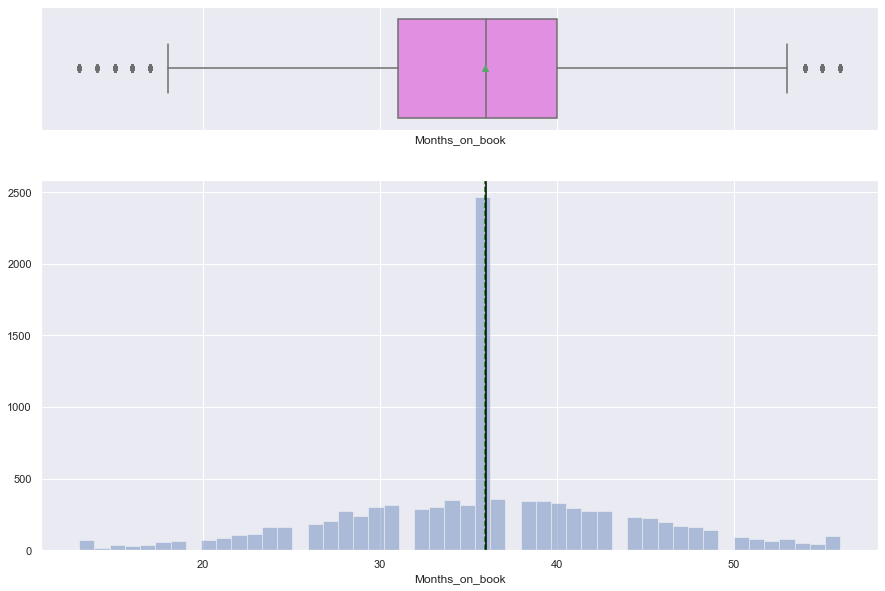

In [173]:
histogram_boxplot(df['Months_on_book'])

* Data for months on books/ relation with bank shows normal distribution. both mean and median lies very closely.
* the box plot shows 50% of data lies between 30 and 40 months. and we have outliers on both ends for min and max scale.
* There are some outliers detected on both ends of box plots but we are not treating them.

### Observations on Total Relationship Count

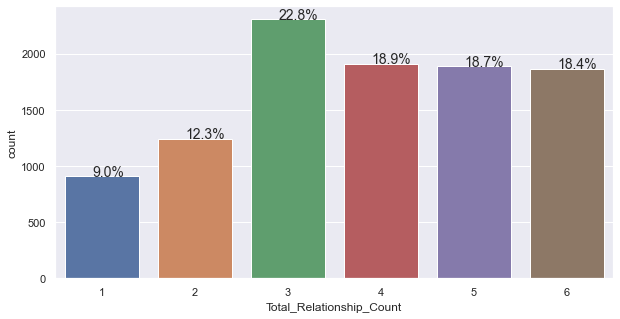

In [174]:
perc_on_bar(df['Total_Relationship_Count'])

* This is the data for number of products held by customer with the bank. for example customer having banking account, debit cards, credit cards, some kind loans..etc..
* So the data shows as follows:
1 product: 9% ,
2 product: 12.3% ,
3 products: 22.8% ,
4 products: 18.9% ,
5 products: 18.7% ,
6 products: 18.4% 

### Bivariate Analysis

In [175]:
df.corr()

CLIENTNUM  Customer_Age  Dependent_count  \
CLIENTNUM                  1.000000      0.007613         0.006772   
Customer_Age               0.007613      1.000000        -0.122254   
Dependent_count            0.006772     -0.122254         1.000000   
Months_on_book             0.134588      0.788912        -0.103062   
Total_Relationship_Count   0.006907     -0.010931        -0.039076   
Months_Inactive_12_mon     0.005729      0.054361        -0.010768   
Contacts_Count_12_mon      0.005694     -0.018452        -0.040505   
Credit_Limit               0.005708      0.002476         0.068065   
Total_Revolving_Bal        0.000825      0.014780        -0.002688   
Avg_Open_To_Buy            0.005633      0.001151         0.068291   
Total_Amt_Chng_Q4_Q1       0.017369     -0.062042        -0.035439   
Total_Trans_Amt           -0.019692     -0.046446         0.025046   
Total_Trans_Ct            -0.002961     -0.067097         0.049912   
Total_Ct_Chng_Q4_Q1        0.007696     -0.012143         0.011087   
Avg_Utilization_Ratio      0.000266      0.007114        -0.037135   

                          Months_on_book  Total_Relationship_Count  \
CLIENTNUM                       0.134588                  0.006907   
Customer_Age                    0.788912                 -0.010931   
Dependent_count                -0.103062                 -0.039076   
Months_on_book                  1.000000                 -0.009203   
Total_Relationship_Count       -0.009203                  1.000000   
Months_Inactive_12_mon          0.074164                 -0.003675   
Contacts_Count_12_mon          -0.010774                  0.055203   
Credit_Limit                    0.007507                 -0.071386   
Total_Revolving_Bal             0.008623                  0.013726   
Avg_Open_To_Buy                 0.006732                 -0.072601   
Total_Amt_Chng_Q4_Q1           -0.048959                  0.050119   
Total_Trans_Amt                -0.038591                 -0.347229   
Total_Trans_Ct                 -0.049819                 -0.241891   
Total_Ct_Chng_Q4_Q1            -0.014072                  0.040831   
Avg_Utilization_Ratio          -0.007541                  0.067663   

                          Months_Inactive_12_mon  Contacts_Count_12_mon  \
CLIENTNUM                               0.005729               0.005694   
Customer_Age                            0.054361              -0.018452   
Dependent_count                        -0.010768              -0.040505   
Months_on_book                          0.074164              -0.010774   
Total_Relationship_Count               -0.003675               0.055203   
Months_Inactive_12_mon                  1.000000               0.029493   
Contacts_Count_12_mon                   0.029493               1.000000   
Credit_Limit                           -0.020394               0.020817   
Total_Revolving_Bal                    -0.042210              -0.053913   
Avg_Open_To_Buy                        -0.016605               0.025646   
Total_Amt_Chng_Q4_Q1                   -0.032247              -0.024445   
Total_Trans_Amt                        -0.036982              -0.112774   
Total_Trans_Ct                         -0.042787              -0.152213   
Total_Ct_Chng_Q4_Q1                    -0.038989              -0.094997   
Avg_Utilization_Ratio                  -0.007503              -0.055471   

                          Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
CLIENTNUM                     0.005708             0.000825         0.005633   
Customer_Age                  0.002476             0.014780         0.001151   
Dependent_count               0.068065            -0.002688         0.068291   
Months_on_book                0.007507             0.008623         0.006732   
Total_Relationship_Count     -0.071386             0.013726        -0.072601   
Months_Inactive_12_mon       -0.020394            -0.042210        -0.016605   
Contacts_Count_12_mon  

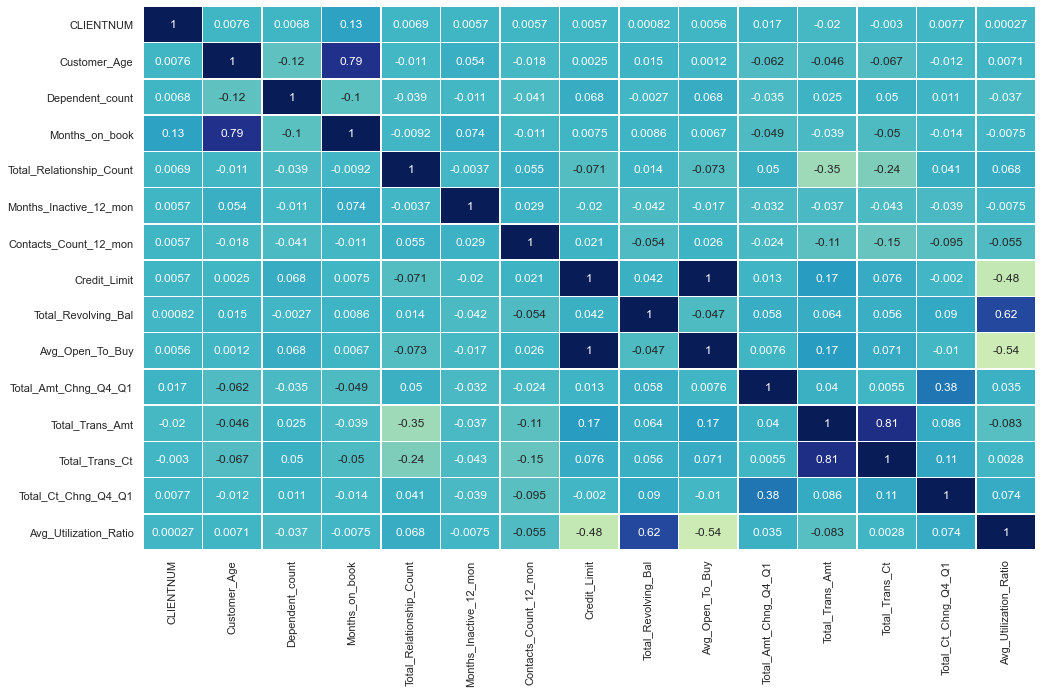

In [176]:
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

 * From the above correlation table and correlation heat map we can see following variables are more likely correlated with each other.
* Positive Relation:
1. Total_Trans_Amt: Total Transaction Amount (Last 12 months) vs Total_Trans_Ct: Total Transaction Count (Last 12 months) 
2. Months_on_book: Period of relationship with the bank vs Customer_Age: Age in Years
3. Avg_Utilization_Ratio: Average Card Utilization Ratio vs Total_Revolving_Bal: Total Revolving Balance on the Credit Card
4. Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1) vs Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Negative Relation:
1. Credit_Limit: Credit Limit on the Credit Card vs Avg_Utilization_Ratio: Average Card Utilization Ratio
2. Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months) vs Avg_Utilization_Ratio: Average Card Utilization Ratio
3. Total_Relationship_Count: Total no. of products held by the customer vs Total_Trans_Amt: Total Transaction Amount (Last 12 months)
4. Total_Trans_Ct: Total Transaction Count (Last 12 months) vs Total_Relationship_Count: Total no. of products held by the customer

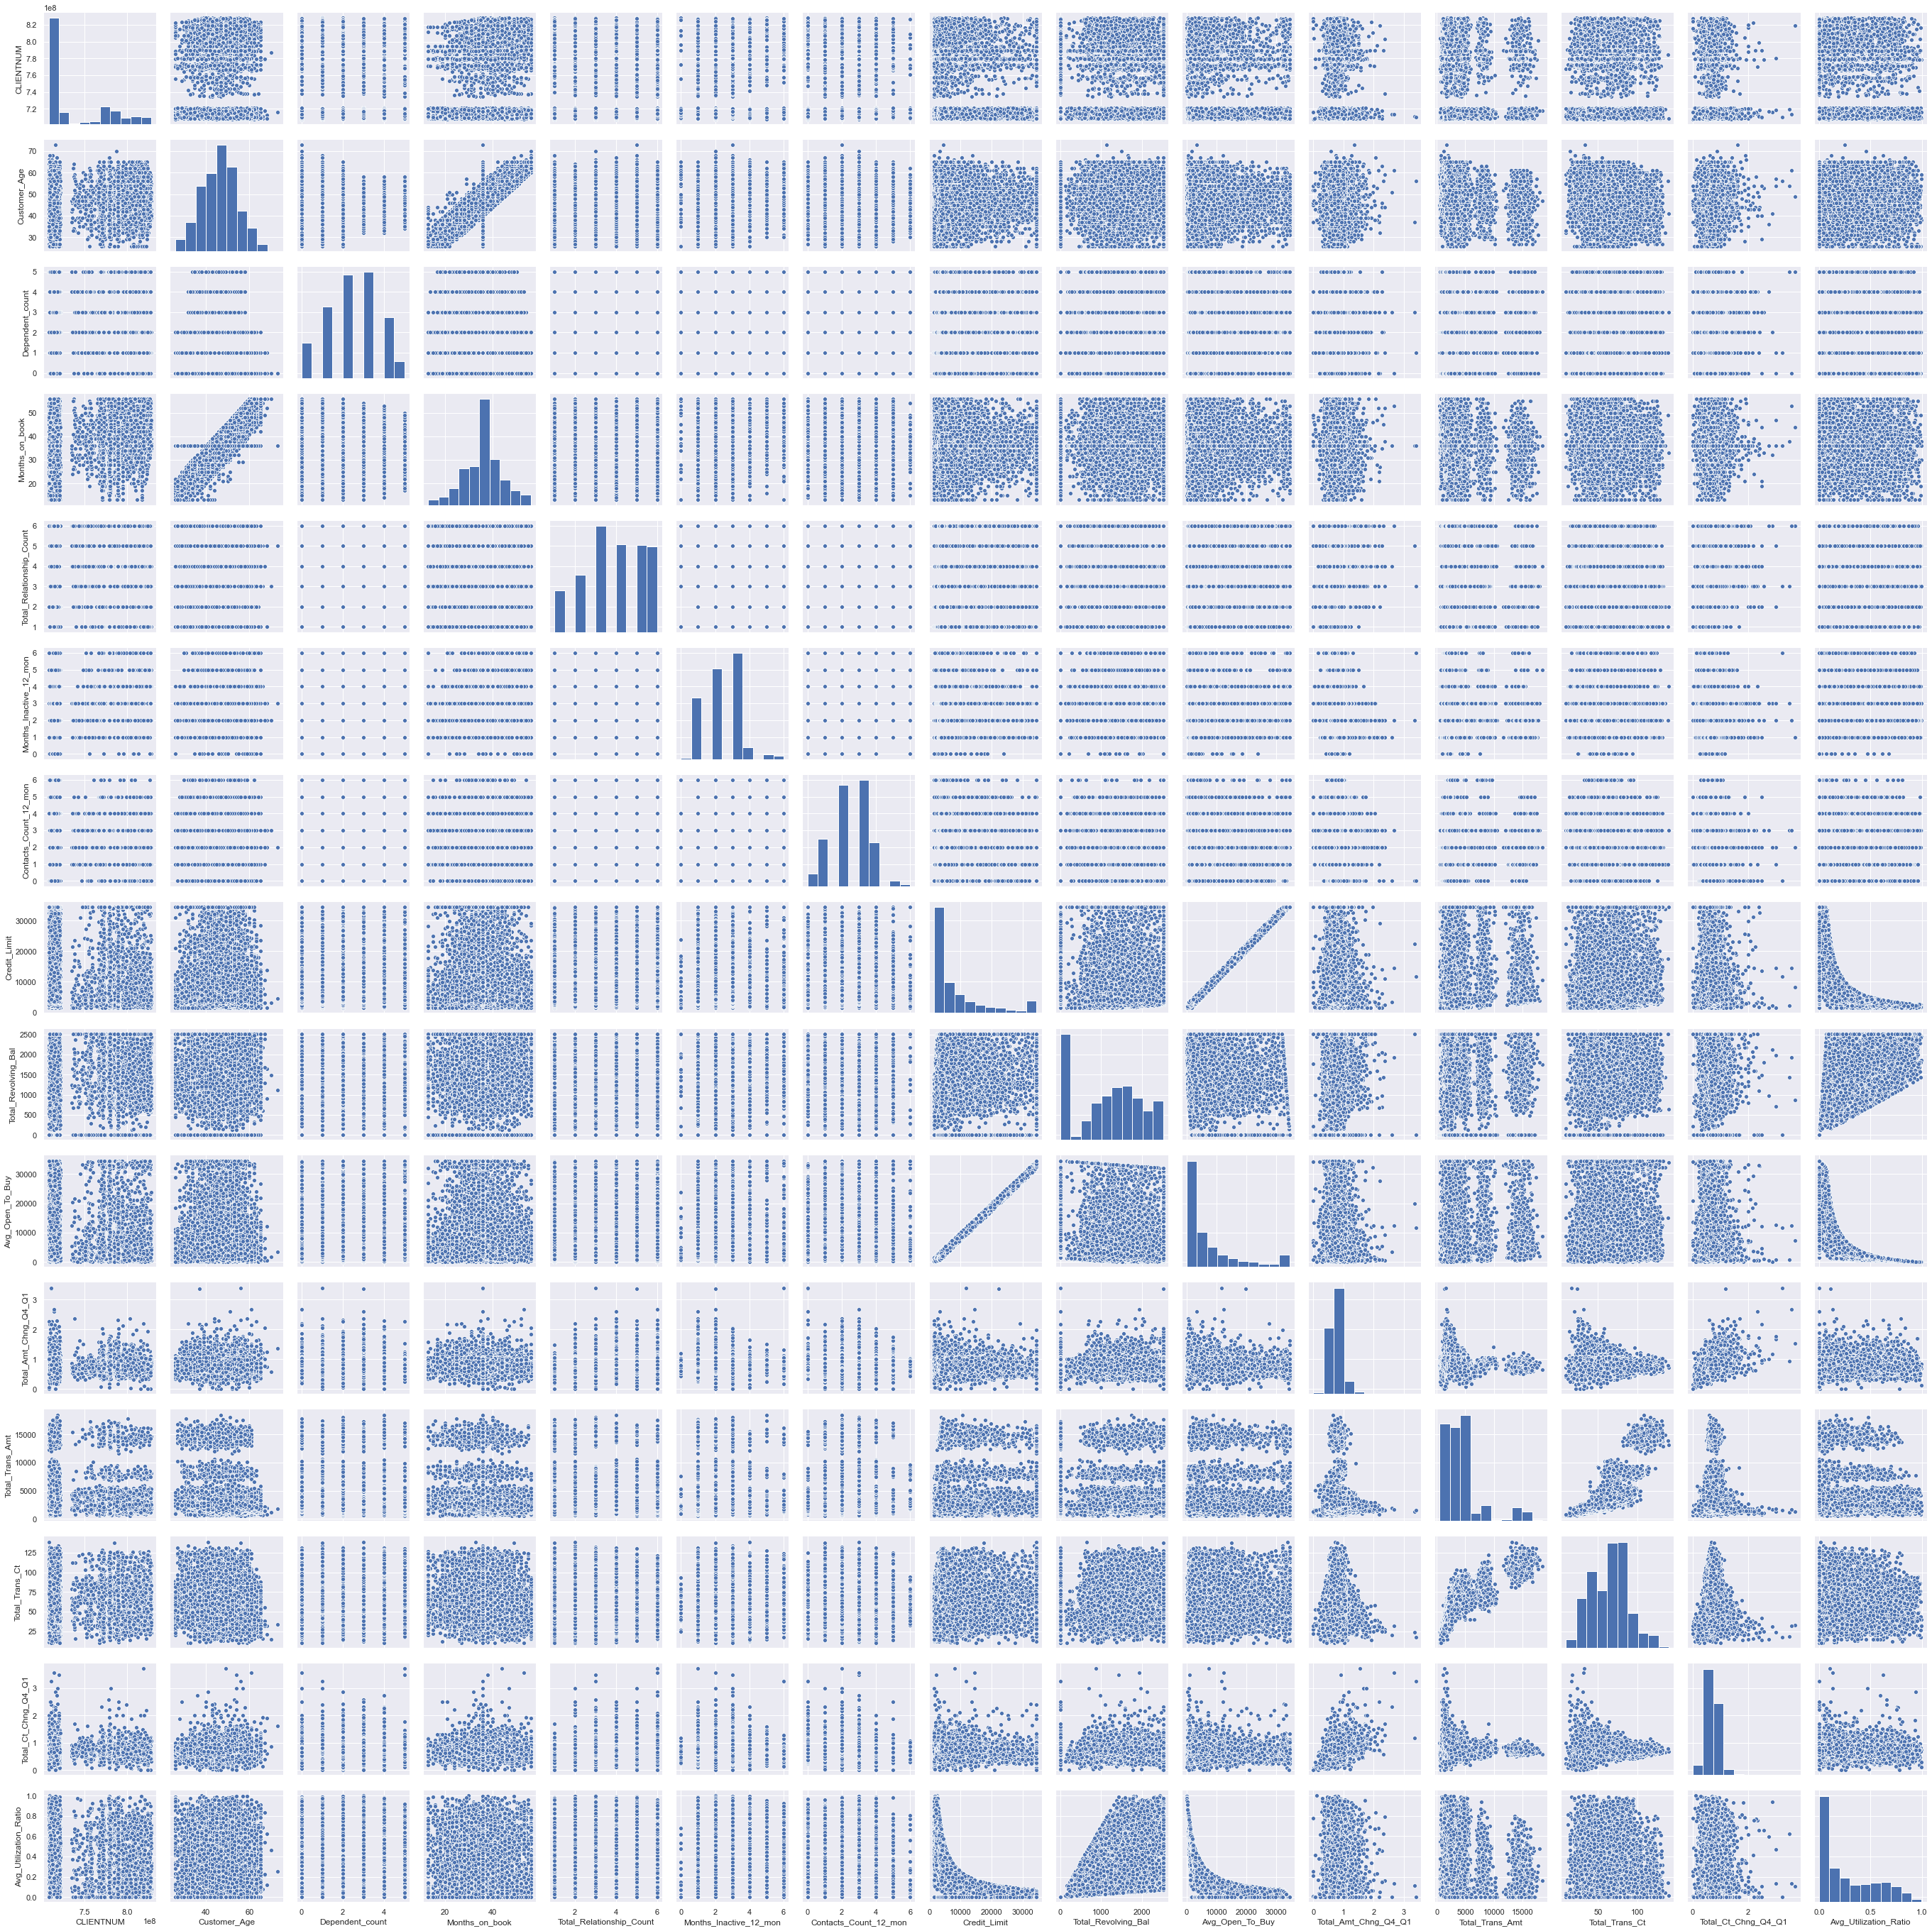

In [177]:
sns.pairplot(df)

#### Total_Trans_Amt: Total Transaction Amount (Last 12 months) vs Total_Trans_Ct: Total Transaction Count (Last 12 months) 

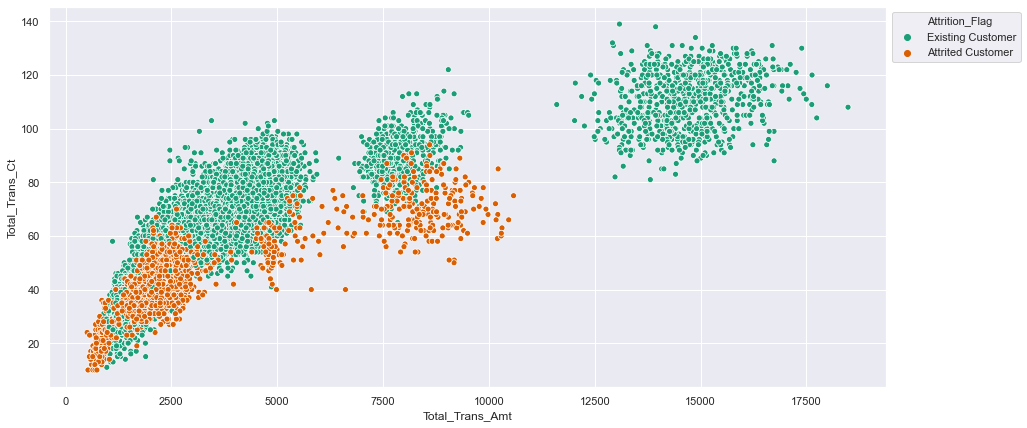

In [178]:
plt.figure(figsize=(15,7))
sns.scatterplot(df["Total_Trans_Amt"],df["Total_Trans_Ct"],hue=df["Attrition_Flag"],ci=0.,palette="Dark2")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* From the above data visualization it looks like customers who made transaction count below 80 and transaction amount below 3000 and inbetween 7500 to 10000 are more likely closing their credit card compare to others who made more transactions.

#### Months_on_book: Period of relationship with the bank vs Customer_Age: Age in Years

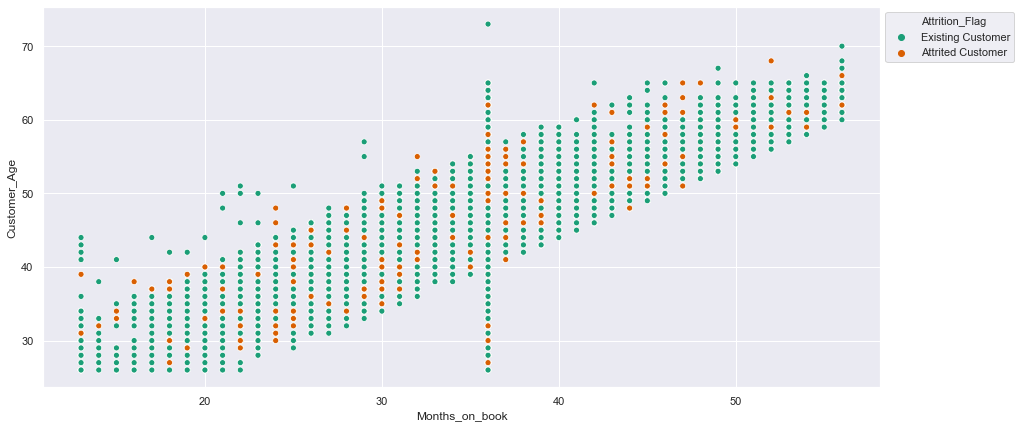

In [179]:
plt.figure(figsize=(15,7))
sns.scatterplot(df["Months_on_book"],df["Customer_Age"],hue=df["Attrition_Flag"],ci=0.,palette="Dark2")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* From the above visualization we cannot draw any conclusions even though there is great positive correlation as all customers across all ages are having few customers who are closing their credit card services

#### Avg_Utilization_Ratio: Average Card Utilization Ratio vs Total_Revolving_Bal: Total Revolving Balance on the Credit Card

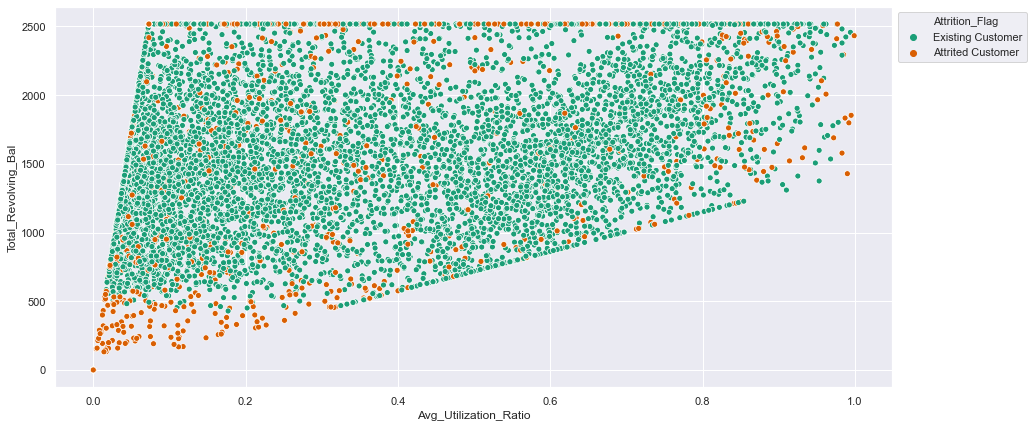

In [180]:
plt.figure(figsize=(15,7))
sns.scatterplot(df["Avg_Utilization_Ratio"],df["Total_Revolving_Bal"],hue=df["Attrition_Flag"],ci=0.,palette="Dark2")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Above visualization shows more customers are churning out are from customers who are having less avgutilization below 20% and their total revolving balance is below 500.

#### Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1) vs Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)

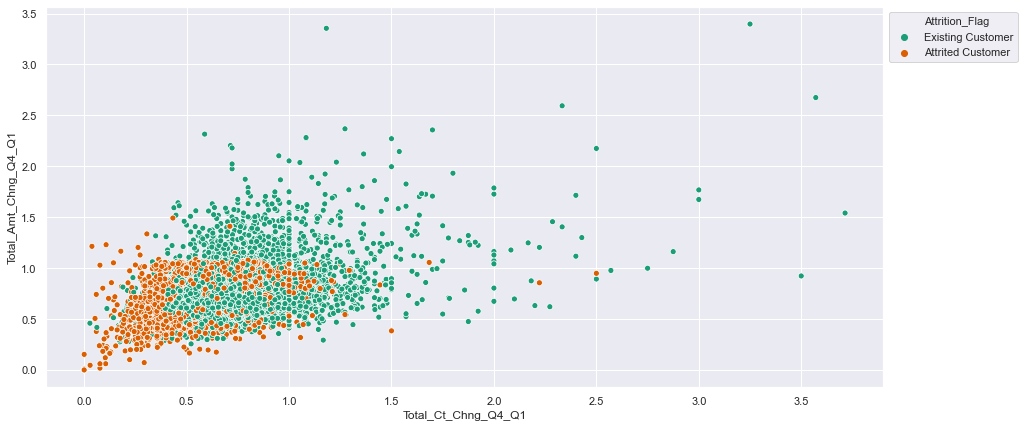

In [181]:
plt.figure(figsize=(15,7))
sns.scatterplot(df["Total_Ct_Chng_Q4_Q1"],df["Total_Amt_Chng_Q4_Q1"],hue=df["Attrition_Flag"],ci=0.,palette="Dark2")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* data visualization displays customers with Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1) below 1.0 and Total_Amt_Chng_Q4_Q1 below 1.0 are morely leaving/closing credit card services

#### Average Utilization ratio vs Income Category

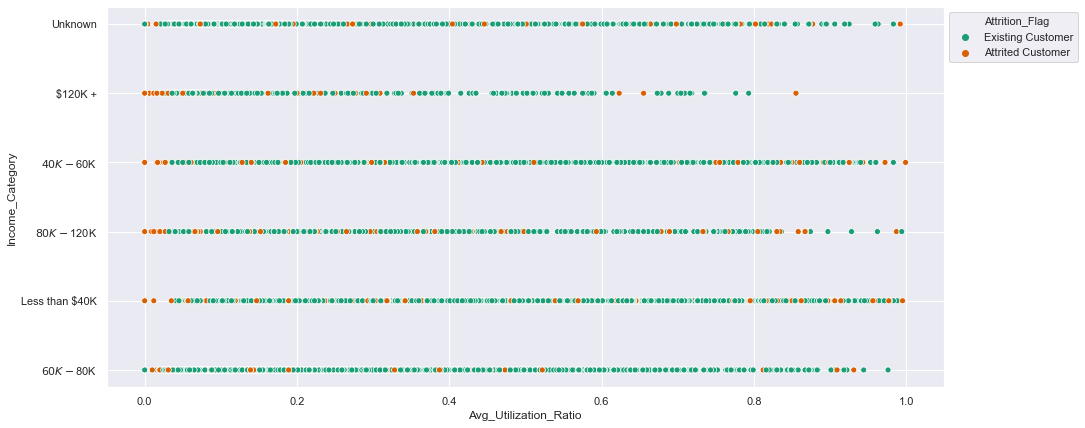

In [182]:
plt.figure(figsize=(15,7))
sns.scatterplot(df["Avg_Utilization_Ratio"],df["Income_Category"],hue=df["Attrition_Flag"],ci=0.,palette="Dark2")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* We can observe very small portion of customers with income between leass than 40K to 120k+ and average utilization is leass than 0.1 are attrited customers..

#### Credit_Limit: Credit Limit on the Credit Card vs Avg_Utilization_Ratio: Average Card Utilization Ratio

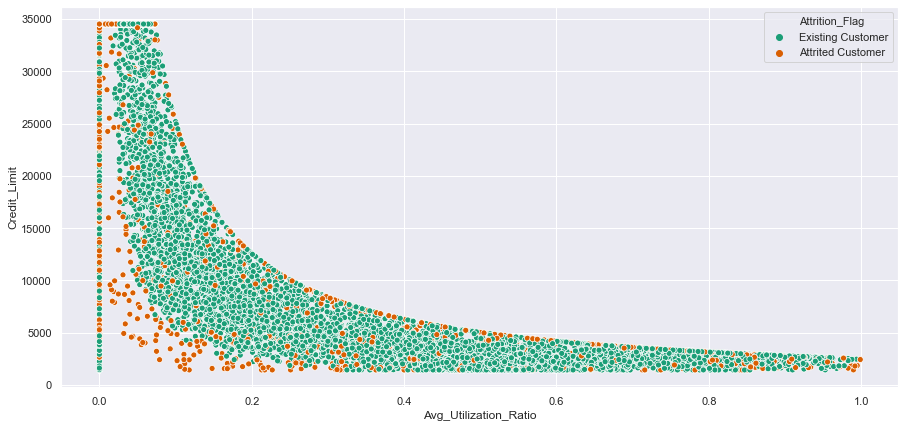

In [183]:
plt.figure(figsize=(15,7))
sns.scatterplot(df["Avg_Utilization_Ratio"],df["Credit_Limit"],hue=df["Attrition_Flag"],ci=0.,palette="Dark2")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Customers with below 0.2% utilization and having lesser credit limit below 10K are noted as attrited customers

#### Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months) vs Avg_Utilization_Ratio: Average Card Utilization Ratio

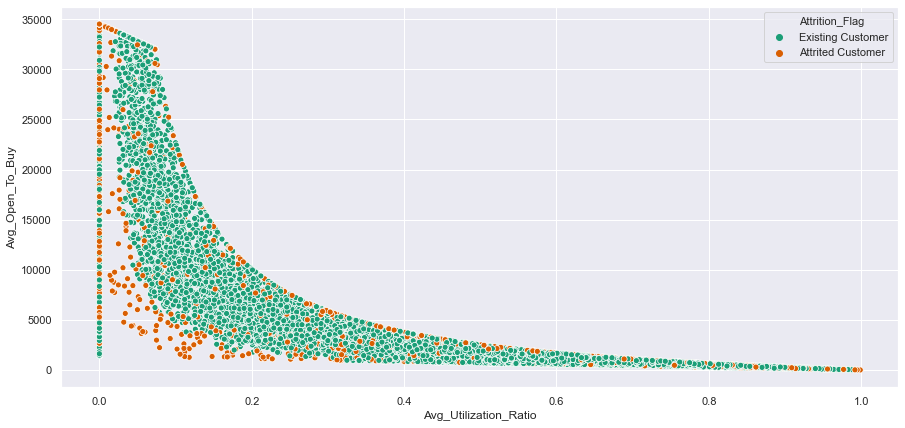

In [184]:
plt.figure(figsize=(15,7))
sns.scatterplot(df["Avg_Utilization_Ratio"],df["Avg_Open_To_Buy"],hue=df["Attrition_Flag"],ci=0.,palette="Dark2")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Customers with below 20% avg utilization and having below avg open to buy credit line below 10000 are more likely attrited.

#### Total_Relationship_Count: Total no. of products held by the customer vs Total_Trans_Amt: Total Transaction Amount (Last 12 months)

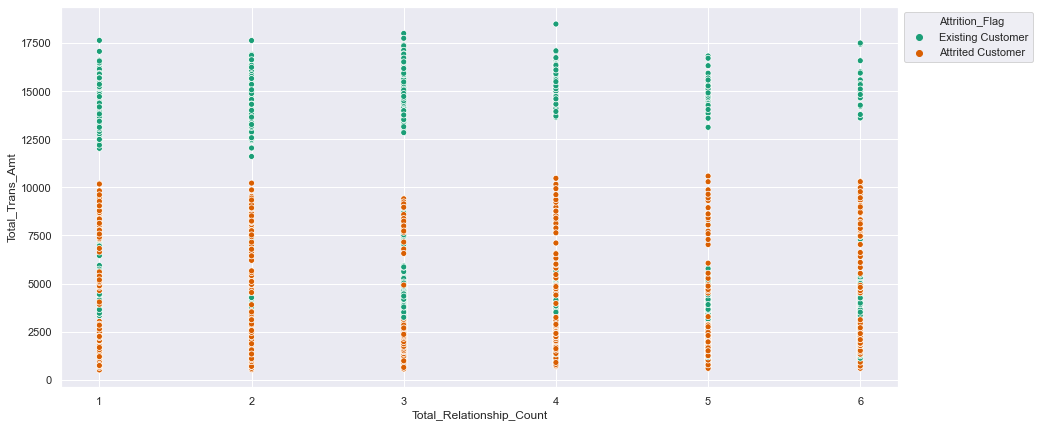

In [185]:
plt.figure(figsize=(15,7))
sns.scatterplot(df["Total_Relationship_Count"],df["Total_Trans_Amt"],hue=df["Attrition_Flag"],ci=0.,palette="Dark2")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Above data visualization displays clear info about customers having all kind of relationship count with bank with leass than 10000 total amount transaction in last 12 months are recognised as Attrited customers or more likely to closing credit cards

#### Total_Trans_Ct: Total Transaction Count (Last 12 months) vs Total_Relationship_Count: Total no. of products held by the customer

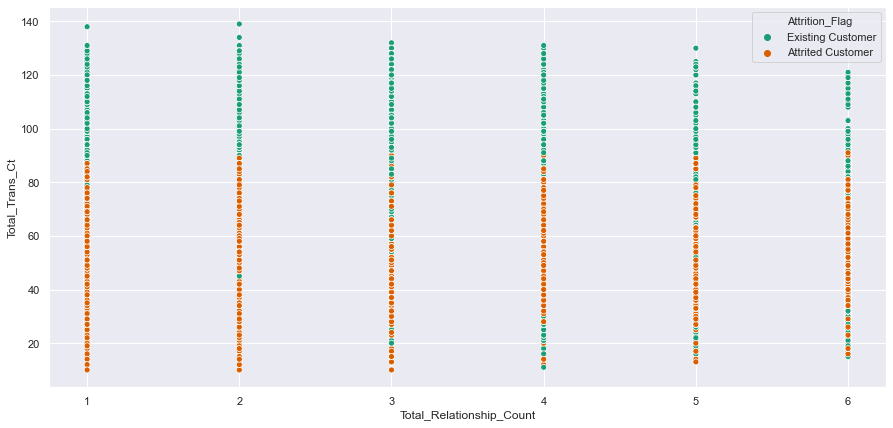

In [186]:
plt.figure(figsize=(15,7))
sns.scatterplot(df["Total_Relationship_Count"],df["Total_Trans_Ct"],hue=df["Attrition_Flag"],ci=0.,palette="Dark2")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* majority of customers with less transaction count below 80 in last 12 months are leaving the bank.

In [451]:
## Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, data["Attrition_Flag"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, data["Attrition_Flag"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Attrition_Flag   Attrited Customer  Existing Customer    All
Education_Level                                             
College                        154                859   1013
Doctorate                       95                356    451
Graduate                       487               2641   3128
High School                    306               1707   2013
Post-Graduate                   92                424    516
Uneducated                     237               1250   1487
Unknown                        256               1263   1519
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


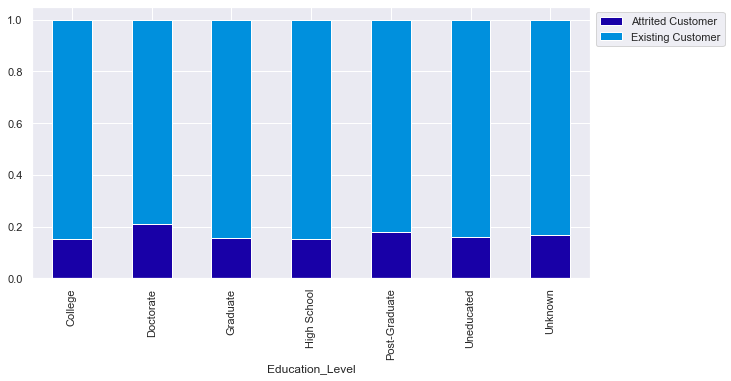

In [452]:
stacked_plot(data["Education_Level"])

Attrition_Flag  Attrited Customer  Existing Customer    All
Marital_Status                                             
Divorced                      121                627    748
Married                       709               3978   4687
Single                        668               3275   3943
Unknown                       129                620    749
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


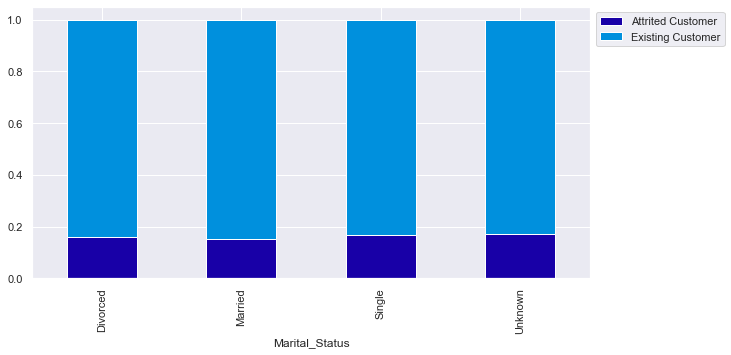

In [453]:
stacked_plot(data["Marital_Status"])

* Highest attrited customers are from married

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
Blue                         1519               7917   9436
Gold                           21                 95    116
Platinum                        5                 15     20
Silver                         82                473    555
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


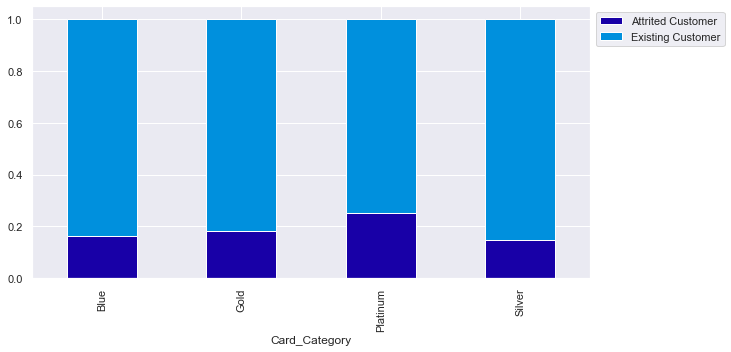

In [460]:
stacked_plot(data["Card_Category"])

* People with platinum card type are very less in number but 30% of them are attrited.

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
$120K +                        126                601    727
$40K - $60K                    271               1519   1790
$60K - $80K                    189               1213   1402
$80K - $120K                   242               1293   1535
Less than $40K                 612               2949   3561
Unknown                        187                925   1112
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


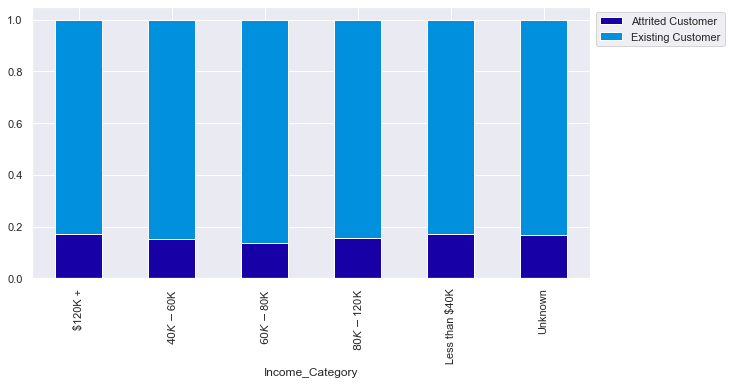

In [456]:
stacked_plot(data["Income_Category"])

* Customers with less than 40K income are little more in number who are churning out

### Data Preparation for Model building

In [193]:
#dopping client num column as it is unique num for each customer and doest not useful in model building.
df.drop('CLIENTNUM', axis=1, inplace=True)

In [194]:
df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

* Now the ClientNum column is removed from the dataset

In [195]:
df['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [196]:
# Changing the attrition_flag values to 0 and 1 as stated in data dictionry. lets keep account is closed then 1 else 0
flag = {'Existing Customer' : '0' , 'Attrited Customer' : '1'}

In [197]:
df.replace({"Attrition_Flag": flag}, inplace=True)

In [198]:
df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0              0            45      M                3     High School   
1              0            49      F                5        Graduate   
2              0            51      M                3        Graduate   
3              0            40      F                4     High School   
4              0            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

* We can see attrition flag values changed. so now as per business problem 0 is existing customers(account is open) and 1 is attrited customer(account is closed)

In [199]:
# Income column has range of income values which will be difficult for analysis and model building. So lets label the income range.
Income_Category = {'Less than $40K' : 1, '$40K - $60K' : 2, '$60K - $80K' : 3, '$80K - $120K' : 4, '$120K +' : 5, 'Unknown' : 0}

In [200]:
df.replace({"Income_Category": Income_Category}, inplace=True)

In [201]:
card = {'Blue':1, 'Silver':2, 'Gold':3, 'Platinum':4}

In [202]:
df.replace({"Card_Category": card}, inplace=True)

In [204]:
sex = {'M':1, 'F':0}

In [205]:
df.replace({"Gender": sex}, inplace=True)

In [207]:
education = {'Uneducated':1, 'High School':2, 'College':3, 'Graduate':4, 'Post-Graduate':5, 'Doctorate':6, 'Unknown':0}

In [208]:
df.replace({"Education_Level": education}, inplace=True)

In [210]:
maritalstatus = {'Single':1, 'Married':2, 'Divorced':3, 'Unknown':4}

In [211]:
df.replace({"Marital_Status": maritalstatus}, inplace=True)

In [212]:
df.head()

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0              0            45       1                3                2   
1              0            49       0                5                4   
2              0            51       1                3                4   
3              0            40       0                4                2   
4              0            40       1                3                1   

   Marital_Status  Income_Category  Card_Category  Months_on_book  \
0               2                3              1              39   
1               1                1              1              44   
2               2                4              1              36   
3               4                1              1              34   
4               2                3              1              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

* Now we can see we changed the income category values with pre-defined labelling for better data analysis.


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int64  
 5   Marital_Status            10127 non-null  int64  
 6   Income_Category           10127 non-null  int64  
 7   Card_Category             10127 non-null  int64  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [214]:
df['Attrition_Flag'] = df['Attrition_Flag'].astype('int64')

In [215]:
df.dtypes

Attrition_Flag                int64
Customer_Age                  int64
Gender                        int64
Dependent_count               int64
Education_Level               int64
Marital_Status                int64
Income_Category               int64
Card_Category                 int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

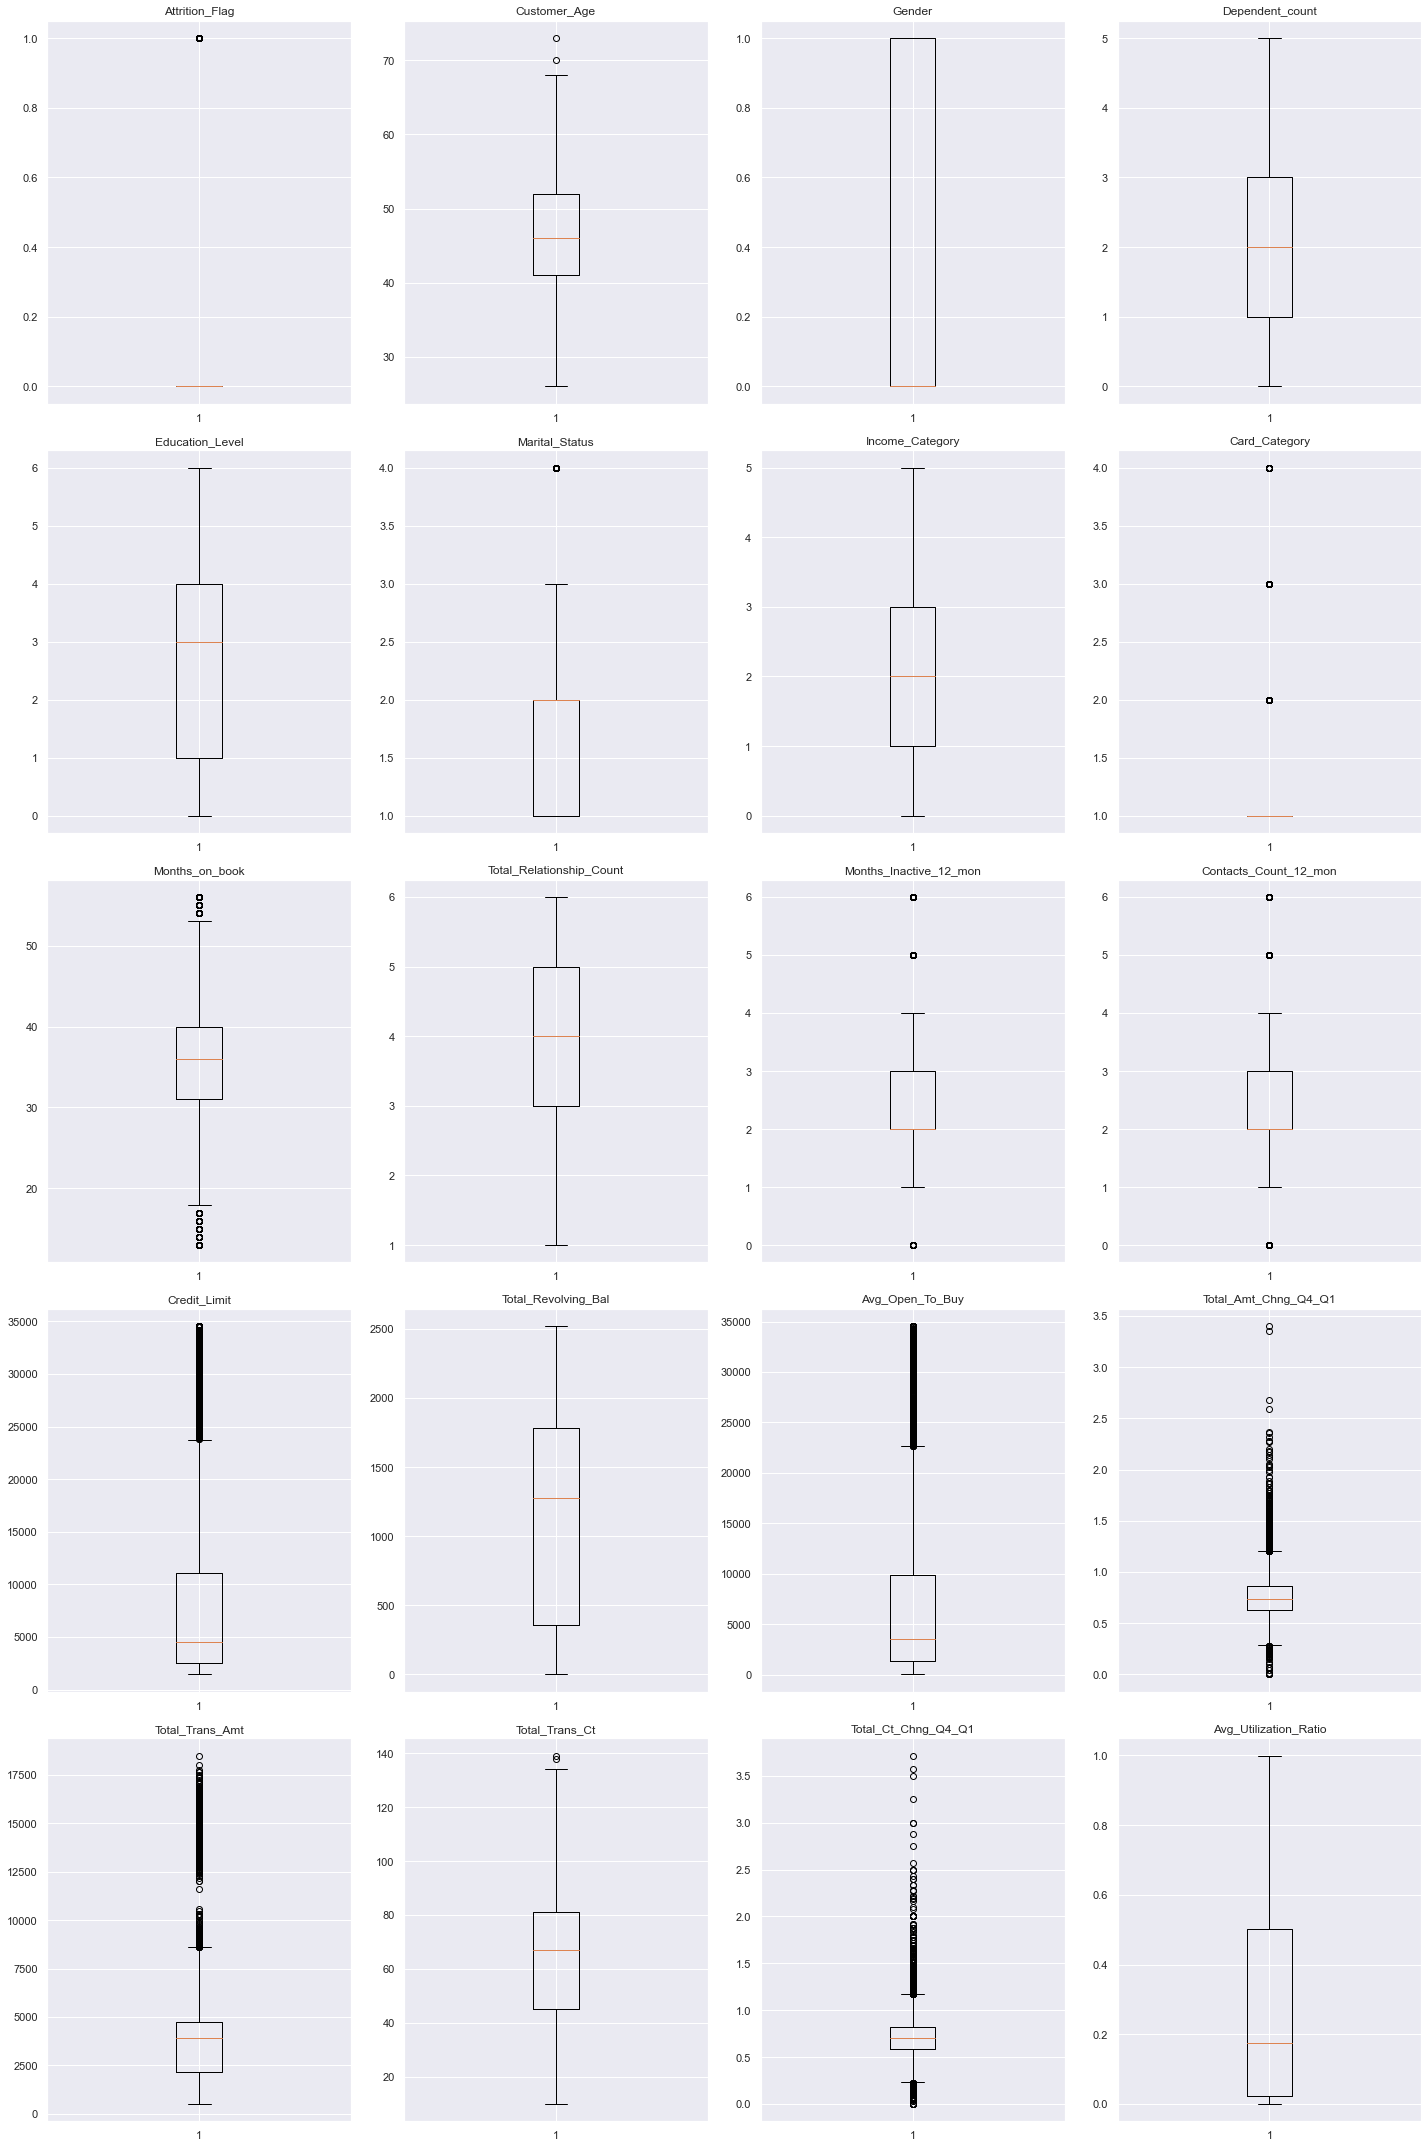

In [216]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

* We are not treating outliers at this moment of time because some variables will always have variations in data in real time scenarios. So lets build the model first and see how current data gives the results.

In [217]:
df.head()

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0               0            45       1                3                2   
1               0            49       0                5                4   
2               0            51       1                3                4   
3               0            40       0                4                2   
4               0            40       1                3                1   

   Marital_Status  Income_Category  Card_Category  Months_on_book  \
0               2                3              1              39   
1               1                1              1              44   
2               2                4              1              36   
3               4                1              1              34   
4               2                3              1              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [218]:
df.dtypes

Attrition_Flag                int64
Customer_Age                  int64
Gender                        int64
Dependent_count               int64
Education_Level               int64
Marital_Status                int64
Income_Category               int64
Card_Category                 int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

## Logistic regression Classifier

### Split the data to Train and Test

In [383]:
array = df.values
X = array[:,1:] # select all rows and first 8 columns which are the attributes
Y = array[:,0]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)


numpy.ndarray

In [384]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 19) (3039, 19)


In [385]:
X

array([[4.500e+01, 1.000e+00, 3.000e+00, ..., 4.200e+01, 1.625e+00,
        6.100e-02],
       [4.900e+01, 0.000e+00, 5.000e+00, ..., 3.300e+01, 3.714e+00,
        1.050e-01],
       [5.100e+01, 1.000e+00, 3.000e+00, ..., 2.000e+01, 2.333e+00,
        0.000e+00],
       ...,
       [4.400e+01, 0.000e+00, 1.000e+00, ..., 6.000e+01, 8.180e-01,
        0.000e+00],
       [3.000e+01, 1.000e+00, 2.000e+00, ..., 6.200e+01, 7.220e-01,
        0.000e+00],
       [4.300e+01, 0.000e+00, 2.000e+00, ..., 6.100e+01, 6.490e-01,
        1.890e-01]])

In [386]:
Y

array([0., 0., 0., ..., 1., 1., 1.])

#### Installing imblearn package to use SMOTE

In [365]:
!pip install imblearn


In [366]:
from imblearn.over_sampling import SMOTE

In [387]:
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


print("After UpSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))



print('After UpSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))



Before UpSampling, counts of label '1': 1139
Before UpSampling, counts of label '0': 5949 

After UpSampling, counts of label '1': 5949
After UpSampling, counts of label '0': 5949 

After UpSampling, the shape of train_X: (11898, 19)
After UpSampling, the shape of train_y: (11898,) 



### Fit the model on original data i.e. before upsampling

In [388]:
# Fit the model on original data i.e. before upsampling
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)

0.8772622573214873


In [389]:
test_pred = model.predict(X_test)

print(metrics.classification_report(y_test, test_pred))
print(metrics.confusion_matrix(y_test, test_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93      2551
         1.0       0.68      0.44      0.53       488

    accuracy                           0.88      3039
   macro avg       0.79      0.70      0.73      3039
weighted avg       0.86      0.88      0.87      3039

[[2453   98]
 [ 275  213]]


### UpSample smaller class

In [390]:
# fit model on upsampled data 

model.fit(X_train_res, y_train_res)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.8058571898650873
[[2046  505]
 [  85  403]]
              precision    recall  f1-score   support

         0.0       0.96      0.80      0.87      2551
         1.0       0.44      0.83      0.58       488

    accuracy                           0.81      3039
   macro avg       0.70      0.81      0.73      3039
weighted avg       0.88      0.81      0.83      3039



### Down Sampling the larger class

In [391]:
existing_cus = df[df['Attrition_Flag'] == 0].index   # Get the record numbers of existed customers
num_existing_cus = len(df[df['Attrition_Flag'] == 0])             # how many existing customers
print(num_existing_cus)

attrited_cus = df[df['Attrition_Flag'] == 1].index       # record number of the attrited customers
attrited = len(df[df['Attrition_Flag'] == 1])                # how many attrited customers
print(attrited)


8500
1627


In [392]:
random_customers = np.random.choice( existing_cus, num_existing_cus - 6000 , replace=False)    #Randomly pick up 3000 existing customers

In [393]:
down_sample_customers = np.concatenate([attrited_cus,random_customers])  # combine the 3000 existing customers with attrited customers

In [394]:
df_down_sample = df.loc[down_sample_customers]  # Extract all those records for existing & attrited customers to create new set
df_down_sample.shape
df_down_sample.groupby(["Attrition_Flag"]).count()  # look at the attrition distribution after downsample

Customer_Age  Gender  Dependent_count  Education_Level  \
Attrition_Flag                                                           
0                       2500    2500             2500             2500   
1                       1627    1627             1627             1627   

                Marital_Status  Income_Category  Card_Category  \
Attrition_Flag                                                   
0                         2500             2500           2500   
1                         1627             1627           1627   

                Months_on_book  Total_Relationship_Count  \
Attrition_Flag                                             
0                         2500                      2500   
1                         1627                      1627   

                Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
Attrition_Flag                                                                
0                                 2500                   2500          2500   
1                                 1627                   1627          1627   

                Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
Attrition_Flag                                                               
0                              2500             2500                  2500   
1                              1627             1627                  1627   

                Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
Attrition_Flag                                                         
0                          2500            2500                 2500   
1                          1627            1627                 1627   

                Avg_Utilization_Ratio  
Attrition_Flag                         
0                                2500  
1                                1627

In [395]:
array = df_down_sample.values
X = array[:,1:19] # select all rows and first 8 columns which are the attributes
Y = array[:,0]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

numpy.ndarray

In [396]:
print('After DownSampling, the shape of X_train: {}'.format(X_train.shape))
print('After DownSampling, the shape of X_test: {} \n'.format(X_test.shape))

After DownSampling, the shape of X_train: (2888, 18)
After DownSampling, the shape of X_test: (1239, 18) 



In [397]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.8022598870056498
[[646  95]
 [150 348]]
              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       741
         1.0       0.79      0.70      0.74       498

    accuracy                           0.80      1239
   macro avg       0.80      0.79      0.79      1239
weighted avg       0.80      0.80      0.80      1239



## Building Classification models using Bagging , Boosting, Hypertuning

### Model Evaluation Criterion:

#### Model Can make wrong predictions such as
1. Predicting the customer will attrite the credit card services but he doesn't 
2. Predicting the customer continue his credit card service but he attrite/close the account 

#### Which case id important ?
Predicting the customer continue his credit card service but he attrite/close the account . This results in loss of revenue to the bank.

#### How to reduce this loss i.e need to reduce False Negatives?
* Company wants Recall to be maximized, greater the Recall lesser the chances of false negatives.

In [398]:
df1 = df.copy()

In [399]:
df1.head()

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0               0            45       1                3                2   
1               0            49       0                5                4   
2               0            51       1                3                4   
3               0            40       0                4                2   
4               0            40       1                3                1   

   Marital_Status  Income_Category  Card_Category  Months_on_book  \
0               2                3              1              39   
1               1                1              1              44   
2               2                4              1              36   
3               4                1              1              34   
4               2                3              1              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

### Split the data into train and test data

In [400]:
# Separating target variable and other variables
X = df1.drop(columns="Attrition_Flag")
Y = df1["Attrition_Flag"]

In [401]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 19) (3039, 19)


### Bagging Classifier

In [402]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [403]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [404]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [405]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [406]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.996331828442438
Accuracy on test set :  0.9618295491938138
Recall on training set :  0.9806848112379281
Recall on test set :  0.8565573770491803
Precision on training set :  0.9964317573595004
Precision on test set :  0.9008620689655172


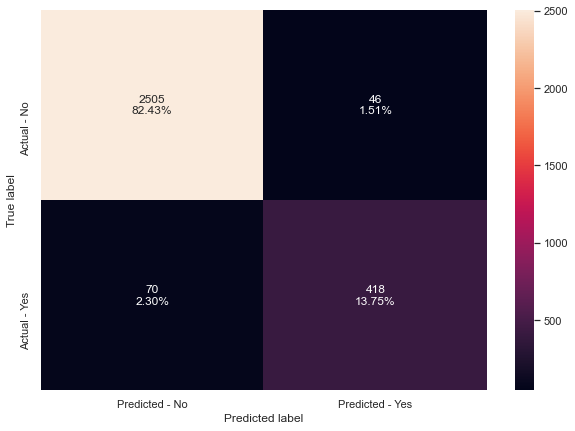

In [407]:
make_confusion_matrix(bagging_estimator,y_test)

* From the above bagging classifier we got good accuracy on both train and test and they are quite close.
* Precision ate is good on both training and test but we have to focus on maximizing the recall. lets see how this one performs in hypertuning.

### Random Forest Classifier

In [408]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [409]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9582099374794341
Recall on training set :  1.0
Recall on test set :  0.8073770491803278
Precision on training set :  1.0
Precision on test set :  0.9227166276346604


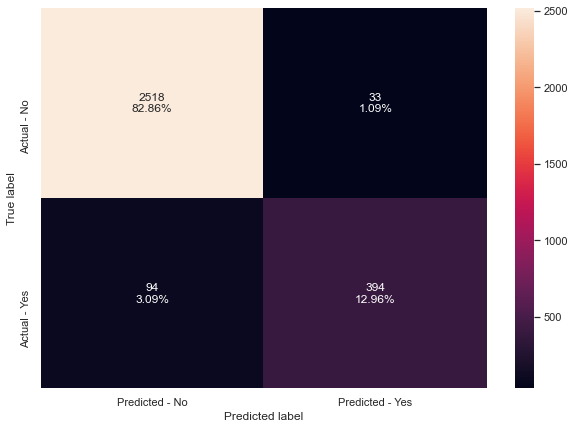

In [410]:
make_confusion_matrix(rf_estimator,y_test)

* Random classifier shows better results on test recall. but looks like it is overfitting training data. lets see whappens with hypertuning.

### Decision Tree Classifier

In [411]:
dtree=DecisionTreeClassifier(random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [412]:
dtree_score=get_metrics_score(dtree)

Accuracy on training set :  1.0
Accuracy on test set :  0.9404409345179335
Recall on training set :  1.0
Recall on test set :  0.8278688524590164
Precision on training set :  1.0
Precision on test set :  0.8063872255489022


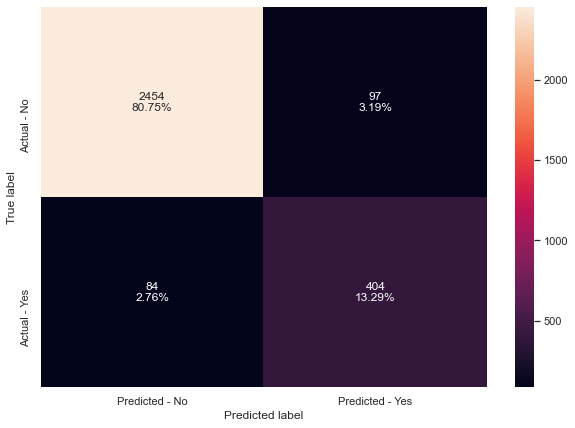

In [413]:
make_confusion_matrix(dtree,y_test)

* Decision tree classifier is overfitting on traing.
* Recall is not so good compare to Random classifier and boosting classifier.

## Boosting

In [414]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#To install xgboost library use - !pip install xgboost 
from xgboost import XGBClassifier

### Adaboosting Classifier

In [415]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [416]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.9571106094808126
Accuracy on test set :  0.9565646594274433
Recall on training set :  0.8410886742756805
Recall on test set :  0.8483606557377049
Precision on training set :  0.8862164662349676
Precision on test set :  0.8771186440677966


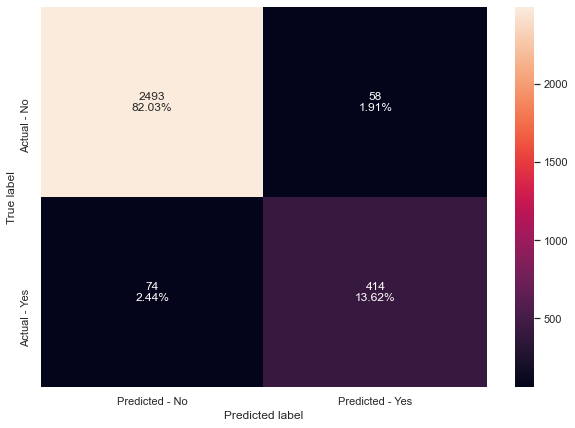

In [417]:
make_confusion_matrix(abc,y_test)

* This adaboost classifier perfomed good on both training and test data.

### GradientBoost Classifier

In [418]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [419]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.9757336343115124
Accuracy on test set :  0.9654491609081934
Recall on training set :  0.8893766461808604
Recall on test set :  0.860655737704918
Precision on training set :  0.9565627950897073
Precision on test set :  0.9190371991247265


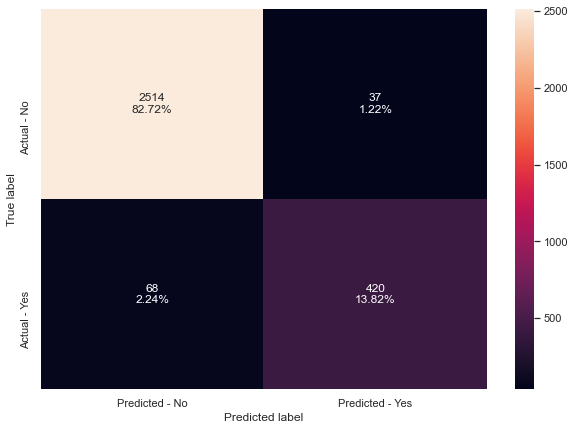

In [420]:
make_confusion_matrix(gbc,y_test)

* So far this isthe best accuracy we can observ both on training and test data.
* Recall is also very good on both training, test.

### XGBoost Classifier

In [421]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,y_train)

[01:51:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [422]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  1.0
Accuracy on test set :  0.9736755511681474
Recall on training set :  1.0
Recall on test set :  0.9118852459016393
Precision on training set :  1.0
Precision on test set :  0.9232365145228216


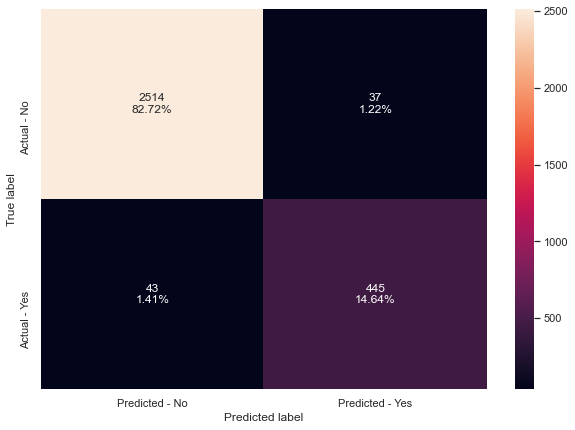

In [423]:
make_confusion_matrix(xgb,y_test)

* even though it looks like it is overfitting on training set, this model performed well on test set also. so we can use this hypertuning.

### Hyperparameter Tuning models using Gridsearch CV & Ransdomsearch CV

**We will use pipelines with StandardScaler and  AdaBoost model and tune the model using GridSearchCV and RandomizedSearchCV. We will also compare the performance and time taken by these two methods - grid search and randomized search.**

**We can also use make_pipeline function instead of Pipeline to create a pipeline.**

**`make_pipeline`: This is a shorthand for the Pipeline constructor; it does not require, and does not permit, naming the estimators. Instead, their names will be set to the lowercase of their types automatically.**

**Fist, let's create two functions to calculate different metrics and confusion matrix, so that we don't have to use the same code repeatedly for each model.**

In [424]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print(
            "Precision on training set : ", metrics.precision_score(y_train, pred_train)
        )
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))

    return score_list  # returning the list with train and test scores

In [425]:
## Function to create confusion matrix
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Adaboost

### GridSearch CV

In [426]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1), 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__n_estimators': 60} 
Score: 0.867451116778731
Wall time: 6min 38s


In [428]:
# Creating new pipeline with best parameters
abc_gridcv = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
        n_estimators=60,
        learning_rate=1,
    ),
)

# Fit the model on training data
abc_gridcv.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=1, n_estimators=60))])

Accuracy on training set :  0.9846218961625283
Accuracy on test set :  0.9730174399473511
Recall on training set :  0.9394205443371378
Recall on test set :  0.9057377049180327
Precision on training set :  0.963963963963964
Precision on test set :  0.9246861924686193


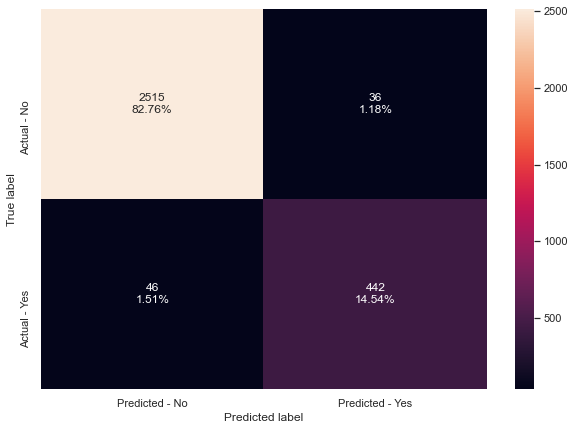

In [429]:
# Calculating different metrics
get_metrics_score(abc_gridcv)

# Creating confusion matrix
make_confusion_matrix(abc_gridcv, y_test)

- The test recall has increased by 4% as compare to cross validated recall


### RandomizedSearchCV

In [430]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
abc_randomcv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
abc_randomcv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(abc_randomcv.best_params_,abc_randomcv.best_score_))

Best parameters are {'adaboostclassifier__n_estimators': 90, 'adaboostclassifier__learning_rate': 0.2, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8586791869541696:
Wall time: 2min 8s


* Grid search CV took longer time than random search
* Both Grid search cv and ransom search cv gave different best parameters.

### Bagging Classifier

### GridSearch CV

In [431]:
bc = BaggingClassifier()

In [432]:
bc.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [433]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), BaggingClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "baggingclassifier__n_estimators": np.arange(10, 110, 10),
    "baggingclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'baggingclassifier__base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1), 'baggingclassifier__n_estimators': 90} 
Score: 0.7023881289125898
Wall time: 50.7 s


In [434]:
# Creating new pipeline with best parameters
bc_gridcv = make_pipeline(
    StandardScaler(),
    BaggingClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
        n_estimators=90,
    ),
)

# Fit the model on training data
bc_gridcv.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingclassifier',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                         random_state=1),
                                   n_estimators=90))])

Accuracy on training set :  0.9198645598194131
Accuracy on test set :  0.912142152023692
Recall on training set :  0.7225636523266022
Recall on test set :  0.7192622950819673
Precision on training set :  0.7655813953488372
Precision on test set :  0.7297297297297297


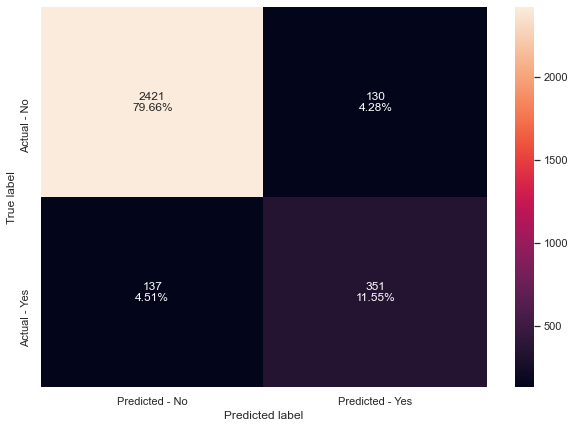

In [435]:
# Calculating different metrics
get_metrics_score(bc_gridcv)

# Creating confusion matrix
make_confusion_matrix(bc_gridcv, y_test)

* After hypertuning the model it seems like the accuracy went down.

### RandomSearch CV

In [436]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), BaggingClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "baggingclassifier__n_estimators": np.arange(10, 110, 10),
    "baggingclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
bc_randomcv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
bc_randomcv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(bc_tuned2.best_params_,bc_tuned2.best_score_))

Best parameters are {'baggingclassifier__n_estimators': 80, 'baggingclassifier__base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.860959685349066:
Wall time: 50.7 s


### Gradientboost classifier

### GridSearch CV

In [437]:
gbc = GradientBoostingClassifier()

In [438]:
gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [439]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

#Parameter grid to pass in GridSearchCV
param_grid={'gradientboostingclassifier__n_estimators':np.arange(10,50,100),
            'gradientboostingclassifier__learning_rate':[0.01,0.1,0.2], 'gradientboostingclassifier__ccp_alpha':[0,1,5],
            'gradientboostingclassifier__subsample':[0.7,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'gradientboostingclassifier__ccp_alpha': 0, 'gradientboostingclassifier__learning_rate': 0.2, 'gradientboostingclassifier__n_estimators': 10, 'gradientboostingclassifier__subsample': 0.7} with CV score=0.6401035628719376:
Wall time: 13.9 s


In [440]:
# Creating new pipeline with best parameters
gbc_gridcv = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(
        ccp_alpha=0,
        learning_rate=0.2,
        n_estimators=10,
        subsample=0.7,
    ),
)

# Fit the model on training data
gbc_gridcv.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(ccp_alpha=0, learning_rate=0.2,
                                            n_estimators=10, subsample=0.7))])

Accuracy on training set :  0.9351015801354402
Accuracy on test set :  0.928923988153998
Recall on training set :  0.6549604916593503
Recall on test set :  0.6229508196721312
Precision on training set :  0.9175891758917589
Precision on test set :  0.9047619047619048


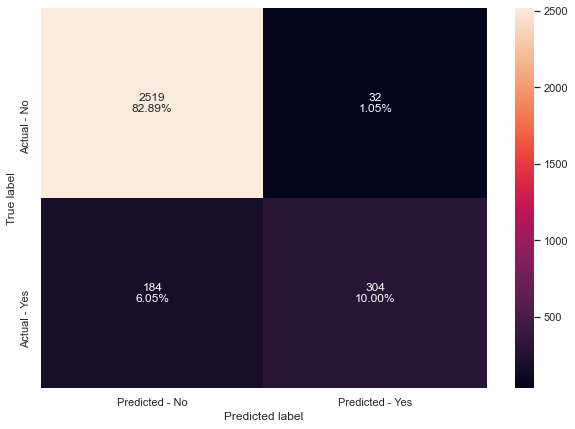

In [441]:
# Calculating different metrics
get_metrics_score(gbc_gridcv)

# Creating confusion matrix
make_confusion_matrix(gbc_gridcv, y_test)

### Randomizedsearch CV

In [442]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

#Parameter grid to pass in RandomizedSearchCV
param_grid= {"gradientboostingclassifier__n_estimators":np.arange(10,50,100),
            "gradientboostingclassifier__learning_rate":[0.01,0.1,0.2], 'gradientboostingclassifier__ccp_alpha':[0,1,5],
            "gradientboostingclassifier__subsample":[0.7,0.9,1],}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
gbc_randomcv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, scoring=scorer, cv=5)

#Fitting parameters in RandomizedSearchCV
gbc_randomcv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(gbc_tuned2.best_params_,gbc_tuned2.best_score_))

Best parameters are {'gradientboostingclassifier__subsample': 0.9, 'gradientboostingclassifier__n_estimators': 10, 'gradientboostingclassifier__learning_rate': 0.2, 'gradientboostingclassifier__ccp_alpha': 0} with CV score=0.8626863323500492:
Wall time: 5.08 s


## Comparing all models

In [443]:
# defining list of models
models = [abc_gridcv, abc_randomcv, bc_gridcv, bc_randomcv, gbc_gridcv, gbc_randomcv]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model, False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [444]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Adaboost with GridSearchCV",
            "Adaboost Tree with RandomizedSearchCV",
            "Bagging Classifier with GridSearchCV",
            "Bagging Classifier with RandomizedSearchCV",
            "Gradient Boost Classifier with GridSearchCV",
            "Gradient Boost Classifier with RandomizedSearchCV"
    
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

Model  Train_Accuracy  \
0                         Adaboost with GridSearchCV        0.984622   
1              Adaboost Tree with RandomizedSearchCV        0.960492   
2               Bagging Classifier with GridSearchCV        0.919865   
3         Bagging Classifier with RandomizedSearchCV        0.726076   
4        Gradient Boost Classifier with GridSearchCV        0.935102   
5  Gradient Boost Classifier with RandomizedSearchCV        0.475856   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0       0.973017      0.939421     0.905738         0.963964        0.924686  
1       0.893443      0.960492     0.893443         0.980287        0.917895  
2       0.912142      0.722564     0.719262         0.765581        0.729730  
3       0.719262      0.726076     0.719262         0.769302        0.734310  
4       0.928924      0.654960     0.622951         0.917589        0.904762  
5       0.442623      0.475856     0.442623         0.945899        0.903766

- The Adaboost model tuned using grid and randomised search is giving the best test recall of 0.90
- Let's see the feature importance from the tuned adaboost model

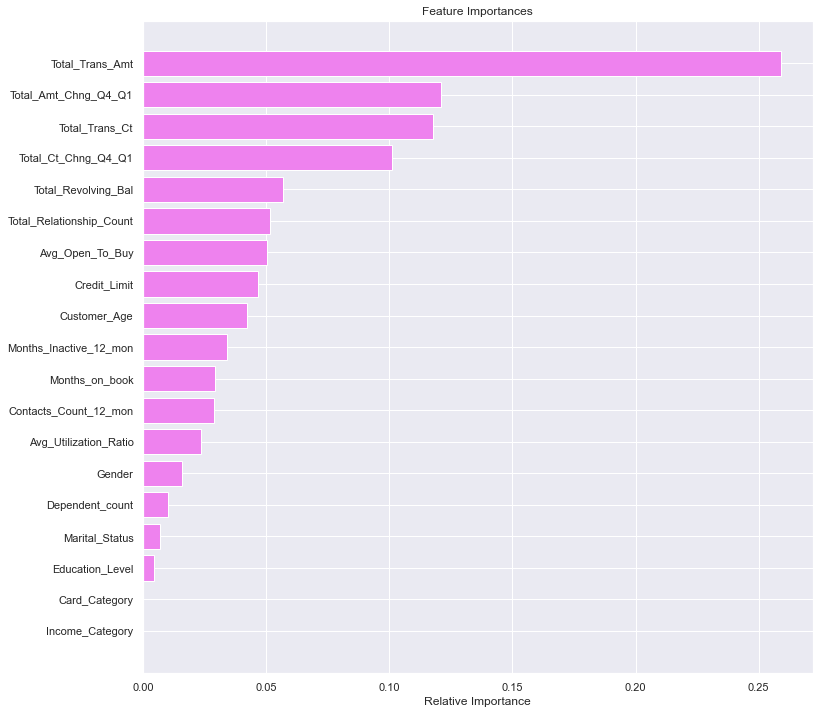

In [447]:
feature_names = X_train.columns
importances = abc_gridcv[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Below are the top five imortant features to identify customers churning out or closing their credit card accounts**

- Total_Trans_Amt: Total Transaction Amount (Last 12 months)
- Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
- Total_Trans_Ct: Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
- Total_Revolving_Bal: Total Revolving Balance on the Credit Card
    

## Business Recommendations

- Bank should focus on customers who are making transactions below 7500 in last 12 months, looks like they are not using credit cards properly and deciding to close accounts. So bank should attract those customers by providing some kind of offers like cash back or etc.

- Focus on customers whose Total Amount change in spending went below 20% from Q4 - Q1

- Bank should focus on customers who are having credit card and not really using it regularly, customers making less than 50 transaction in last 12 months are more likely to be attrited. 

- Customers who are married and having 2 dependents with less than 40K income are using credit cards more, so bank should focus on this type of customers.
